# Word2Vec: Explorando o universo Harry Potter

Neste notebook, vamos usar Word2Vec para explorar os livros Harry Potter.

In [36]:
from gensim.models import Word2Vec
from gensim.utils import tokenize

In [37]:
PATH = 'Harry_Potter_e_A_Pedra_Filosofal.txt'
PATH2 = 'Harry_Potter_Camara_Secreta-br.txt'

## Processamento do texto
Leitura e tokenização dos livros Harry Potter.

In [38]:
f1 = open(PATH, 'r', encoding='utf-8')
f2 = open(PATH2, 'r', encoding='utf-8')

tokenized_text = []

for line in f1:
    tokens = list(tokenize(line, lower=True))
    tokenized_text.append(tokens)

for line in f2:
    tokens = list(tokenize(line, lower=True))
    tokenized_text.append(tokens)

f2.close()
f1.close()

## Treino do modelo Word2Vec

In [39]:
model = Word2Vec(tokenized_text, vector_size=300, window=5, min_count=1, sg=1, epochs=20, workers=3)

## Vetores de palavras

In [40]:
# Vetor para 'harry'
model.wv['harry']

array([-0.00440246,  0.07821993,  0.0067384 , -0.05683101, -0.22365409,
       -0.25693104,  0.01606804,  0.41307145, -0.2338572 ,  0.03118117,
        0.11473543, -0.1539755 , -0.29720712,  0.2515262 , -0.32697436,
       -0.10863198, -0.01163416,  0.26913258,  0.01350454, -0.13155156,
       -0.07007811,  0.07349794, -0.28572112,  0.03696804, -0.32198468,
        0.1469942 , -0.37499085,  0.33193845,  0.16281658, -0.38777474,
        0.01361013, -0.07050829,  0.10827556,  0.00180364, -0.06888079,
        0.10465875,  0.08329385, -0.40456262, -0.0942679 ,  0.12042005,
        0.16751501, -0.00427381, -0.15848921,  0.1973884 ,  0.1924501 ,
        0.2934377 , -0.16585536, -0.09036651,  0.06883671, -0.19456069,
       -0.12176557,  0.04958861,  0.11320253,  0.2207377 , -0.16002785,
        0.13514034,  0.03201407,  0.06788716,  0.40837082,  0.06988674,
        0.10897117,  0.1158036 ,  0.10205454, -0.08662402,  0.00830259,
       -0.17721751,  0.29048598,  0.00070026, -0.12156493,  0.09

## Palavras mais frequentes

In [41]:
# 20 palavras mais frequentes
print(model.wv.index_to_key[:20])

['de', 'que', 'a', 'o', 'e', 'harry', 'se', 'não', 'para', 'um', 'uma', 'os', 'com', 'do', 'em', 'ele', 'da', 'disse', 'é', 'no']


In [42]:
# Palavras mais frequentes sem stopwords
import nltk
from nltk.corpus import stopwords

try:
    stopwords_pt = set(stopwords.words('portuguese'))
except:
    nltk.download('stopwords')
    stopwords_pt = set(stopwords.words('portuguese'))

top_words = model.wv.index_to_key[:100]
top_words_no_stopwords = [w for w in top_words if w not in stopwords_pt]
print(top_words_no_stopwords[:20])

['harry', 'disse', 'rony', 'hagrid', 'coisa', 'hermione', 'bem', 'cabeça', 'olhos', 'ter', 'dumbledore', 'vez', 'perguntou', 'então', 'vai', 'porta', 'agora', 'lo', 'snape', 'parecia']


## Semelhanças entre palavras

In [43]:
# Palavras mais semelhantes a 'harry'
model.wv.most_similar('harry', topn=30)

[('firenze', 0.5911874771118164),
 ('portão', 0.5721911787986755),
 ('desesperado', 0.5705267786979675),
 ('contava', 0.568355143070221),
 ('esguelha', 0.5683403015136719),
 ('sonolento', 0.5678215026855469),
 ('facilidade', 0.567290723323822),
 ('cantar', 0.566868007183075),
 ('mudando', 0.5666989088058472),
 ('excitado', 0.5664428472518921),
 ('abruptamente', 0.5649730563163757),
 ('hesitante', 0.5648330450057983),
 ('ansioso', 0.5647003054618835),
 ('desanimar', 0.5641317963600159),
 ('inclinando', 0.5593018531799316),
 ('nervoso', 0.5592485070228577),
 ('anão', 0.5589275360107422),
 ('tomado', 0.5583491325378418),
 ('pressuroso', 0.5582579374313354),
 ('horário', 0.5576625466346741),
 ('interessado', 0.5571871399879456),
 ('abaixando', 0.5570600032806396),
 ('esticando', 0.556616485118866),
 ('alegria', 0.5562441945075989),
 ('fixo', 0.5546718239784241),
 ('adeus', 0.5526602268218994),
 ('assustado', 0.5525630116462708),
 ('verso', 0.5524516701698303),
 ('pálidos', 0.55203425884246

In [44]:
# Palavras semelhantes a vários personagens
personagens = ['hermione', 'harry', 'dumbledore', 'snape', 'draco']

for personagem in personagens:
    print(f"Mais semelhantes a '{personagem}':")
    similares = model.wv.most_similar(personagem, topn=5)
    for palavra, similaridade in similares:
        print(f"  {palavra}: {similaridade:.4f}")
    print()

Mais semelhantes a 'hermione':
  mione: 0.4695
  granger: 0.4210
  paciência: 0.4176
  neville: 0.4111
  berrador: 0.4111

Mais semelhantes a 'harry':
  firenze: 0.5912
  portão: 0.5722
  desesperado: 0.5705
  contava: 0.5684
  esguelha: 0.5683

Mais semelhantes a 'dumbledore':
  binns: 0.5441
  quirrell: 0.5428
  flitwick: 0.5301
  alvo: 0.5216
  atualmente: 0.5029

Mais semelhantes a 'snape':
  quirrell: 0.5941
  flitwick: 0.5845
  professor: 0.5603
  aula: 0.4977
  potentes: 0.4925

Mais semelhantes a 'draco':
  goyle: 0.6370
  crabbe: 0.6242
  risadinhas: 0.5859
  rir: 0.5592
  gabar: 0.5483



In [45]:
# Semelhança entre pares
pares = [('harry', 'rony'), ('harry', 'hermione'), ('harry', 'dumbledore'), 
         ('harry', 'snape'), ('harry', 'draco'), ('grifinória', 'sonserina')]

for w1, w2 in pares:
    sim = model.wv.similarity(w1, w2)
    print(f"Semelhança entre '{w1}' e '{w2}': {sim:.4f}")

Semelhança entre 'harry' e 'rony': 0.4426
Semelhança entre 'harry' e 'hermione': 0.2224
Semelhança entre 'harry' e 'dumbledore': 0.2247
Semelhança entre 'harry' e 'snape': 0.2557
Semelhança entre 'harry' e 'draco': 0.3292
Semelhança entre 'grifinória' e 'sonserina': 0.6121


## Analogias

In [46]:
print("Analogia: 'snape' + 'grifinória' - 'harry' = ?")
model.wv.most_similar(positive=['snape', 'grifinória'], negative=['harry'], topn=10)

Analogia: 'snape' + 'grifinória' - 'harry' = ?


[('comunal', 0.47455745935440063),
 ('poções', 0.46714839339256287),
 ('aula', 0.4647132456302643),
 ('pontos', 0.4285198748111725),
 ('sonserina', 0.42796841263771057),
 ('descontar', 0.4140985906124115),
 ('corvinal', 0.41406917572021484),
 ('lufa', 0.4059206247329712),
 ('sala', 0.3923766314983368),
 ('feitiços', 0.3884318172931671)]

In [47]:
print("Analogia: 'draco' + 'grifinória' - 'harry' = ?")
model.wv.most_similar(positive=['draco', 'grifinória'], negative=['harry'], topn=10)

Analogia: 'draco' + 'grifinória' - 'harry' = ?


[('pontos', 0.50263911485672),
 ('sonserina', 0.4965439736843109),
 ('membro', 0.4596730172634125),
 ('lufa', 0.4567239582538605),
 ('corvinal', 0.43965205550193787),
 ('johnson', 0.42129695415496826),
 ('angelina', 0.42056313157081604),
 ('concedo', 0.41369229555130005),
 ('liderança', 0.41096362471580505),
 ('ganhado', 0.40889957547187805)]

In [48]:
print("Analogia: 'sonserina' + 'harry' - 'draco' = ?")
model.wv.most_similar(positive=['sonserina', 'harry'], negative=['draco'], topn=5)

Analogia: 'sonserina' + 'harry' - 'draco' = ?


[('posse', 0.4771893322467804),
 ('rouba', 0.4707649052143097),
 ('marcos', 0.4687368869781494),
 ('grifinória', 0.46789926290512085),
 ('barulhenta', 0.4639602303504944)]

In [49]:
print("Analogia: 'hermione' + 'menino' - 'menina' = ?")
model.wv.most_similar(positive=['hermione', 'menino'], negative=['menina'], topn=5)

Analogia: 'hermione' + 'menino' - 'menina' = ?


[('neville', 0.3548643887042999),
 ('parar', 0.35225623846054077),
 ('pare', 0.3398769199848175),
 ('presas', 0.33147701621055603),
 ('fôlego', 0.3195411264896393)]

## Deteção de intrusos

In [50]:
# Detetar intrusos em grupos
grupos = [
    ['harry', 'rony', 'hermione', 'draco'],
    ['grifinória', 'sonserina', 'lufa-lufa', 'corvinal', 'hogwarts'],
    ['quadribol', 'poções', 'transfiguração', 'defesa', 'feitiços'],
    ['varinha', 'vassoura', 'coruja', 'livro', 'sapo']
]

for grupo in grupos:
    intruso = model.wv.doesnt_match(grupo)
    print(f"Grupo: {grupo}")
    print(f"Intruso: {intruso}\n")

Grupo: ['harry', 'rony', 'hermione', 'draco']
Intruso: hermione

Grupo: ['grifinória', 'sonserina', 'lufa-lufa', 'corvinal', 'hogwarts']
Intruso: hogwarts

Grupo: ['quadribol', 'poções', 'transfiguração', 'defesa', 'feitiços']
Intruso: quadribol

Grupo: ['varinha', 'vassoura', 'coruja', 'livro', 'sapo']
Intruso: livro



In [51]:
model.wv.doesnt_match(['quadribol','hagrid', 'sonserina', 'lufa', 'grifinória', 'corvinal'])

'hagrid'

## Visualização com PCA

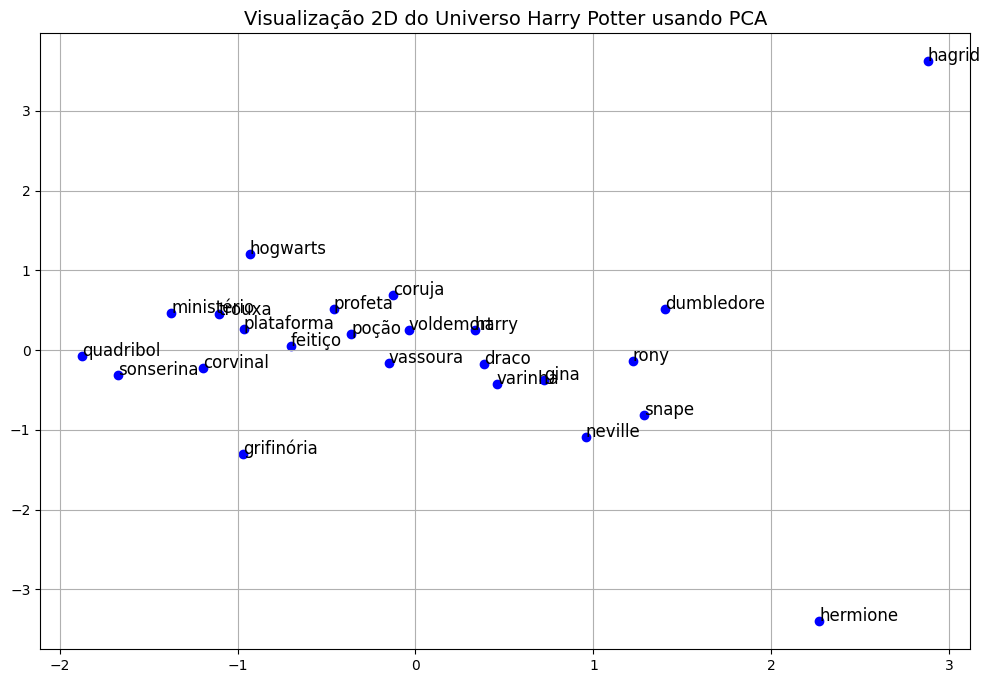

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dados para visualização
harry_potter_words = ['harry', 'rony', 'hermione', 'dumbledore', 'voldemort', 'snape', 'draco', 
                      'hagrid', 'gina', 'neville', 'hogwarts', 'grifinória', 'sonserina', 
                      'lufa-lufa', 'corvinal', 'hogsmeade', 'ministério', 'plataforma', 
                      'quadribol', 'varinha', 'vassoura', 'coruja', 'feitiço', 'poção', 
                      'profeta', 'trouxa']

# Filtrar palavras existentes no vocabulário
palavras_para_plot = [palavra for palavra in harry_potter_words if palavra in model.wv.key_to_index]
vetores = [model.wv[palavra] for palavra in palavras_para_plot]

# PCA para redução de dimensionalidade
pca = PCA(n_components=2)
resultado_2d = pca.fit_transform(vetores)

plt.figure(figsize=(12, 8))
plt.scatter(resultado_2d[:, 0], resultado_2d[:, 1], color='blue')

# Adicionar rótulos
for i, palavra in enumerate(palavras_para_plot):
    plt.annotate(palavra, xy=(resultado_2d[i, 0], resultado_2d[i, 1]), fontsize=12)

plt.title('Visualização 2D do Universo Harry Potter usando PCA', fontsize=14)
plt.grid(True)
plt.show()

## Visualização de personagens

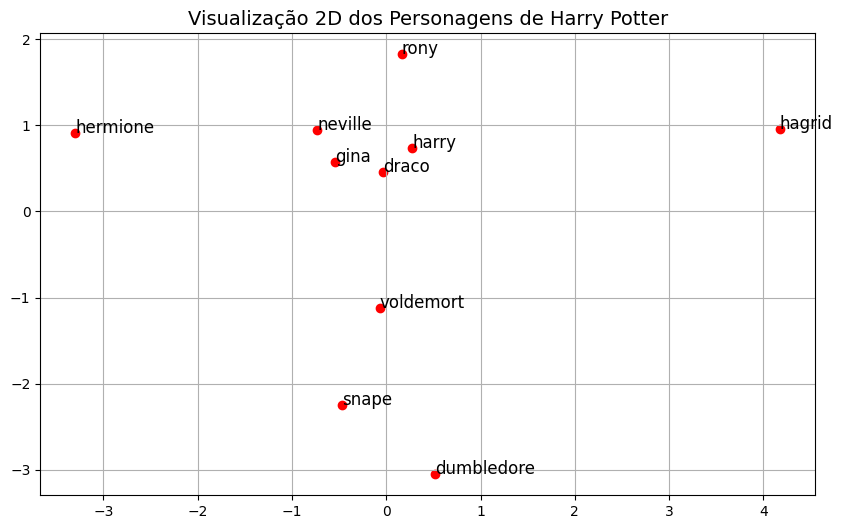

In [53]:
# Personagens
personagens = ['harry', 'rony', 'hermione', 'dumbledore', 'voldemort', 'snape', 'draco', 
              'hagrid', 'gina', 'neville']

personagens_filtrados = [p for p in personagens if p in model.wv.key_to_index]
vetores_personagens = [model.wv[p] for p in personagens_filtrados]

pca = PCA(n_components=2)
resultado_personagens_2d = pca.fit_transform(vetores_personagens)

plt.figure(figsize=(10, 6))
plt.scatter(resultado_personagens_2d[:, 0], resultado_personagens_2d[:, 1], color='red')

for i, personagem in enumerate(personagens_filtrados):
    plt.annotate(personagem, xy=(resultado_personagens_2d[i, 0], resultado_personagens_2d[i, 1]), fontsize=12)

plt.title('Visualização 2D dos Personagens de Harry Potter', fontsize=14)
plt.grid(True)
plt.show()

## Visualização de lugares

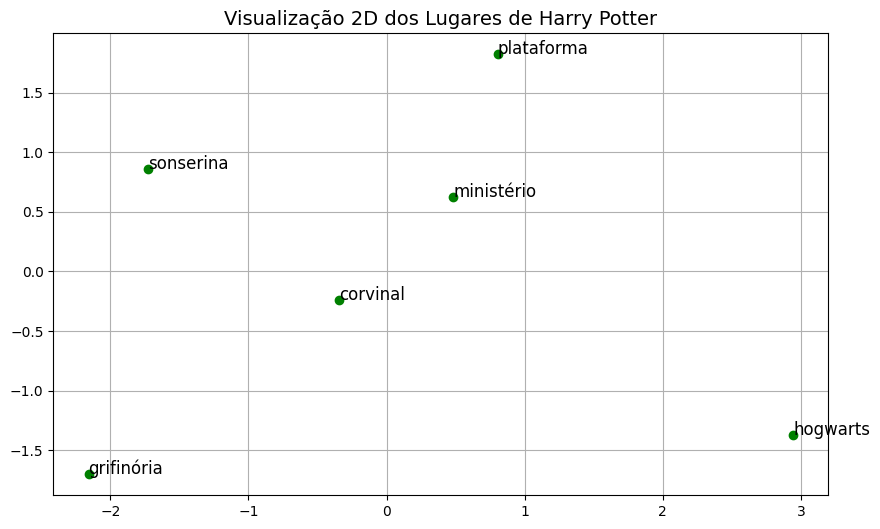

In [54]:
# Lugares
lugares = ['hogwarts', 'grifinória', 'sonserina', 'lufa-lufa', 'corvinal', 'hogsmeade', 
          'ministério', 'plataforma']

lugares_filtrados = [l for l in lugares if l in model.wv.key_to_index]
vetores_lugares = [model.wv[l] for l in lugares_filtrados]

pca = PCA(n_components=2)
resultado_lugares_2d = pca.fit_transform(vetores_lugares)

plt.figure(figsize=(10, 6))
plt.scatter(resultado_lugares_2d[:, 0], resultado_lugares_2d[:, 1], color='green')

for i, lugar in enumerate(lugares_filtrados):
    plt.annotate(lugar, xy=(resultado_lugares_2d[i, 0], resultado_lugares_2d[i, 1]), fontsize=12)

plt.title('Visualização 2D dos Lugares de Harry Potter', fontsize=14)
plt.grid(True)
plt.show()

## Guardar modelo para uso futuro

In [55]:
model.wv.save_word2vec_format('model.txt', binary=False)

## Visualização externa

Para visualizar os embeddings com o TensorFlow Projector:

1. Execute o comando para converter para o formato TensorFlow:
```
python -m gensim.scripts.word2vec2tensor --input model.txt --output model
```

2. Aceda ao site: https://projector.tensorflow.org/

3. Carregue os ficheiros gerados para explorar os embeddings.